In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
# Load the Data:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test /255.0

print("x_train shape", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


In [ ]:
# Build the Model:

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# Compile the Data:

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
r =model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2901 - accuracy: 0.9166 - val_loss: 0.1327 - val_accuracy: 0.9623
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9574 - val_loss: 0.1016 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9687 - val_loss: 0.0877 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9726 - val_loss: 0.0772 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9764 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9787 - val_loss: 0.0746 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9810 - val_loss: 0.0733 - val_accuracy:

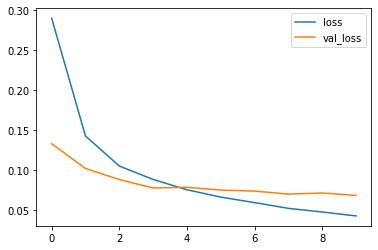

In [ ]:
#Loss per Iteration:

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

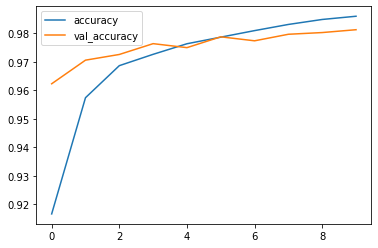

In [ ]:
# Plot accuracy Per Iteration:

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
#Evaluate the Model:

print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9813
[0.06783991307020187, 0.9812999963760376]


Confusion Matrix without normalization
[[ 973    0    3    1    0    0    1    1    1    0]
 [   0 1126    2    1    0    0    2    0    4    0]
 [   2    0 1018    2    0    0    2    4    3    1]
 [   0    0    3  997    0    1    0    3    3    3]
 [   0    0    3    0  957    0    4    3    2   13]
 [   2    1    0   13    1  868    4    0    2    1]
 [   4    3    2    1    5    4  937    0    2    0]
 [   2    5    7    2    0    0    0 1004    1    7]
 [   3    1    2    5    3    5    1    3  947    4]
 [   1    3    0    6    4    1    0    7    1  986]]


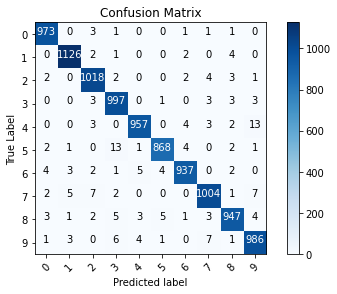

In [ ]:
#Plot Confusion Matrix:

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm ,classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm =cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalize Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)


  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
            horizontalalignment="center",
            color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

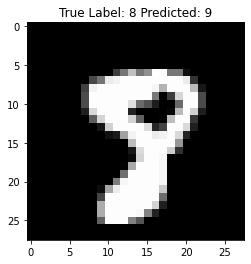

In [ ]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted: %s" % (y_test[i], p_test[i]));